# <u>Vorbereitung:</u>

## 2.1 Vektoralgebra:
### a)

* Inneres Produnkt ist ein Synonym für Skalarprodukt:
Verknüpft zwei Vektoren zu einem Skalar (reelle Zahl) und ist die orthogonale Projektion des einen Vektors auf den anderen.
     
### b) 

* Äußeres Produkt ist ein Synonym für das Kreuzprodukt:
Ergebnisvektor steht senkrecht auf der von den beiden Ausgangsvektoren aufgespannten Ebene.
Seine Länge entspricht dem Flächeninhalt des aufgespannten Parallelogramms

*****

## 2.2: 

* entfällt

## 2.3: 

* entfällt

------

## 2.4 Python (Theorie):
### a)

* shape: Gibt die Größe der Dimensionen einer Matrix (Arrays) aus (also Zeilen/Spalten)

* reshape: Befehl zum festlegen der Zeilen und Spaltenanzahl einer Matrix (im Array)

* ndim: Gibt die Anzahl der Dimensionen einer Matrix (Array) aus.

* size: Gibt die Gesamtanzahl der Elemente im Array aus.

### b)

* a.size ergibt 6, da 3 Zeilen und 2 Spalten 6 "Zellen" mit je einer "1" befüllt sind.

* a.shape ergibt [3,2], da wir 3 Zeilen und 2 Spalten haben

* a.ndim ergibt 2, da 2 Dimensionen aufgespannt sind

## 2.4 Python (Praxis):
### a) Skalar und Kreuzprodukt

In [1]:
import numpy as np
heute=np.array([27,4,2019])
geburt=np.array([4,1,1989])

def skalar3D(a,b):
    return a[0]*b[0]+a[1]*b[1]+a[2]*b[2]
skalar3D(heute,geburt)

4015903

In [2]:
def kreuz3D(a,b):
    return np.array([a[1]*b[2]-a[2]*b[1],a[2]*b[0]-a[0]*b[2],a[0]*b[1]-a[1]*b[0]]).reshape(3,1)
kreuz3D(heute,geburt)

array([[  5937],
       [-45627],
       [    11]])

### b) Matrizen

In [3]:
A=np.ones([3,3])
b=np.ones([3,1])
c=A@b
print("A:")

print(A)
print("b:")

print(b)
print("c:")

print(c)

print('Dimensionen von c:')
print(c.ndim)

A:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
b:
[[1.]
 [1.]
 [1.]]
c:
[[3.]
 [3.]
 [3.]]
Dimensionen von c:
2


# <u>Durchführung:</u>

### 3.1.a) DFT "Schleife"

In [4]:
import matplotlib.pyplot as plt


In [5]:
def dft_schleife(signal):
    N=len(signal)
    w=np.exp(-1j*2*np.pi/N)
    X=np.zeros(N)
    #es zählen alle "k" durch, pro "k" zählen alle "n" durch, multiplizieren sich im Exponenten und summieren
    #sich auf das Zwischenergebnis. Die Endsumme ist unser X und wird returnt
    for k in range(0,N-1):
        wk=w**k
        for n in range(0,N-1):
            X[k]=X[k]+signal[n]*wk**n
    #X=np.array(X[k],dtype=complex)
    return X

### 3.1.b) DFT "Vektor"

In [6]:
def dft_vektor(signal):  
    N=len(signal)
    #Aufspannen einer n*k Matrix durch multiplizieren eines Zeilenvektors mit einem Spaltenvektor für n und k
    #jedes Element bekommt seine Konstante "w" hinzu
    #Skalarprodukt dieser Matrix mit den Signalwerten ergibt das gesuchte Array mit "k"-Werten ==> return
    n=np.arange(0,N).reshape(1,-1)
    k=np.arange(0,N).reshape(-1,1)
    w=2*np.pi/N
    x_nk=np.exp(-1j*w*n*k)   
    return x_nk.dot(signal)

### 3.2) Cosinus-Folge

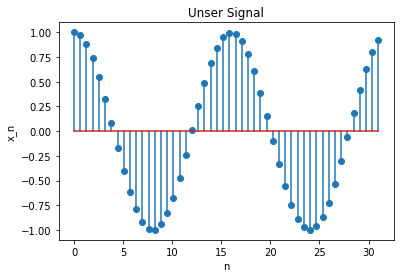

In [17]:
N=32
f=2
omega=2*np.pi*f/N
n=np.linspace(0,N-1)
x_n = np.cos(omega*n)
plt.stem(n, x_n)
plt.xlabel("n")
plt.title("Unser Signal")
plt.ylabel("x_n");

### DFT - Schleife :

C:\Users\tlieb\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  # Remove the CWD from sys.path while we load stuff.


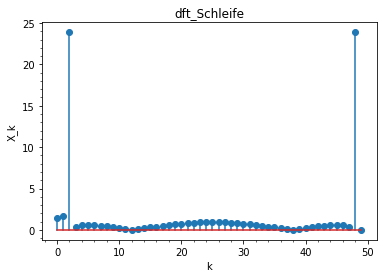

In [8]:
X_k=dft_schleife(x_n)
plt.stem(abs(X_k))
plt.xlabel("k")
plt.ylabel("X_k")
plt.title("dft_Schleife")
plt.minorticks_on()

Text(0.5, 1.0, 'Phase')

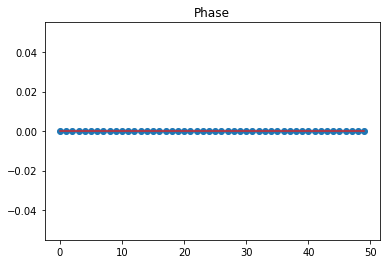

In [14]:
plt.stem(X_k.imag)
plt.title("Phase")

### DFT - Vektor :

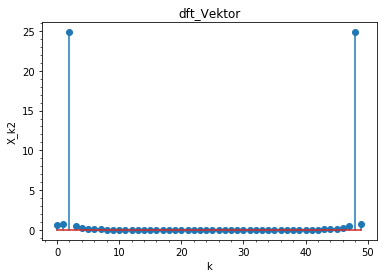

In [10]:
X_k2=dft_vektor(x_n)
plt.stem(abs(X_k2))
plt.xlabel("k")
plt.ylabel("X_k2")
plt.title("dft_Vektor")
plt.minorticks_on();

Text(0.5, 1.0, 'Phase')

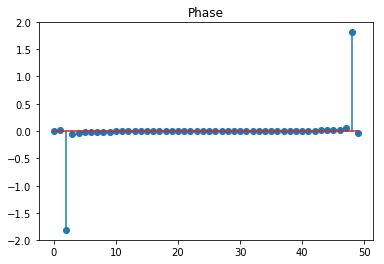

In [15]:
plt.stem(X_k2.imag)
plt.title("Phase")

### DFT mit FFT :

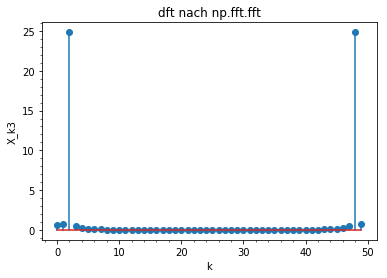

In [12]:
X_k3=np.fft.fft(x_n)
plt.stem(abs(X_k3))
plt.xlabel("k")
plt.ylabel("X_k3")
plt.title("dft nach np.fft.fft")
plt.minorticks_on();


Text(0.5, 1.0, 'Phase')

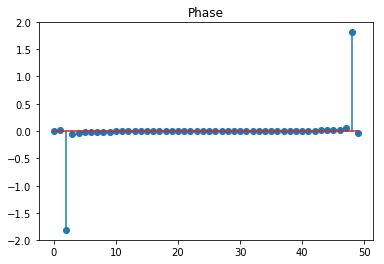

In [16]:
plt.stem(X_k3.imag)
plt.title("Phase")

<b>Vergleich:</b> Die Vektorvariante gleicht der FFT-Lösung von Numpy. Meine Schleifenvariante, scheint die komplexen
Zahlen nicht zu mögen...leider habe ich keine Lösung bisher gefunden.

### 3.2.b) 

Die normierte Kreisfrequenz <b> 2PI/N </b> ist zu wählen. Somit ist die Frequenz f0 bei "1" und die Spektrallinien im Spektrum bei k=1 und k=31.